In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.stats import wilcoxon

### 정규분포를 따르기 않는 데이터 생성

In [2]:
pre_treatment = np.random.rand(20) + 1
post_treatment = np.random.rand(20) + 2

# dataframe 생성
data = pd.DataFrame({
    "pre_treatment" : pre_treatment,
    "post_treatment" : post_treatment
})
data

,pre_treatment,post_treatment
0,1.492520,2.170393
1,1.001071,2.141225
2,1.918940,2.847145
3,1.418867,2.990950
4,1.322154,2.942655
5,1.634269,2.010912
6,1.306194,2.451166
7,1.810480,2.511024
8,1.216153,2.514986
9,1.120883,2.938179


In [3]:
os.makedirs("./data", exist_ok=True)
data.to_csv("./data/non_normal_data.csv", index=False, encoding='utf-8')

In [4]:
# 데이터 가져오기
data = pd.read_csv('./data/non_normal_data.csv')

# 윌콕슨 부호 순위 검정 수행
stat, p = wilcoxon(data['pre_treatment'], data['post_treatment'])
print(stat, p)

0.0 1.9073486328125e-06


In [5]:
if p > 0.05 : 
    print("Fail to reject HO")
else :
    print("Reject HO")

Reject HO


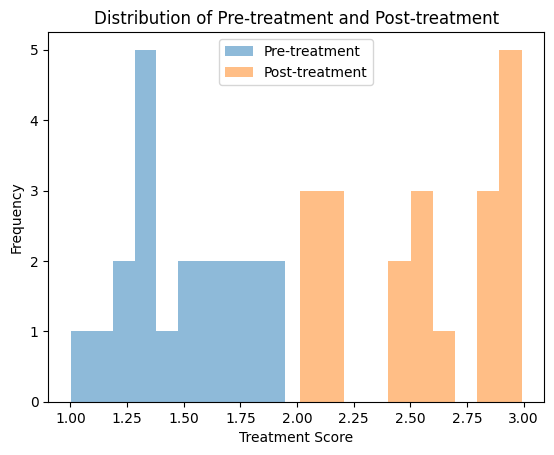

In [7]:
# 분포 시각화
fig, ax = plt.subplots()
ax.hist(data['pre_treatment'], bins=10, alpha=0.5, label='Pre-treatment')
ax.hist(data['post_treatment'], bins=10, alpha=0.5, label='Post-treatment')
ax.set_title('Distribution of Pre-treatment and Post-treatment')
ax.set_xlabel('Treatment Score')
ax.set_ylabel('Frequency')
plt.legend()
plt.show()